In [1]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
def unzip_file(zip_file_path, extract_to_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)
# Example usage:
zip_file_path = '/content/drive/MyDrive/dataset.zip'
extract_to_path = '/dataset'
unzip_file(zip_file_path, extract_to_path)

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Multiply, Reshape, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/dataset/train'
validation_data_dir = '/dataset/val'
test_data_dir = '/dataset/test'

img_width, img_height = 224, 224
batch_size = 32


def squeeze_excite_block(input_tensor, ratio=16):
    num_channels = int(input_tensor.shape[-1])
    print(num_channels)
    x = GlobalAveragePooling2D()(input_tensor)

    x = Dense(num_channels // ratio, activation='relu')(x)
    x = Dense(num_channels, activation='sigmoid')(x)

    x = Reshape((1, 1, num_channels))(x)

    scaled_input = Multiply()([input_tensor, x])

    return scaled_input

base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
x = base_model.output
x = squeeze_excite_block(x)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
output = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

74836368/74836368 [==============================] - 3s 0us/step
1920


In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']      

Found 12165 images belonging to 4 classes.


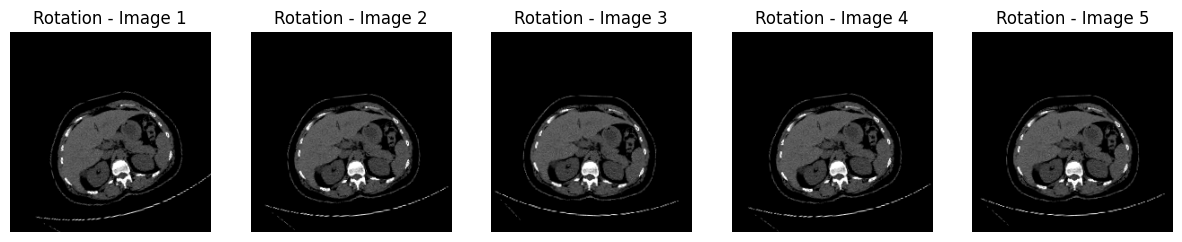

Found 12165 images belonging to 4 classes.


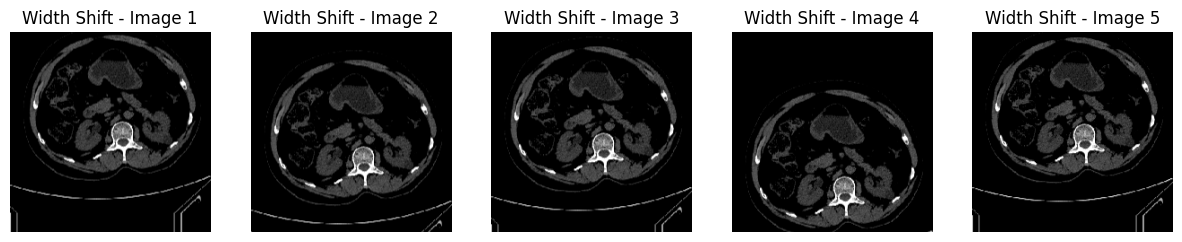

Found 12165 images belonging to 4 classes.


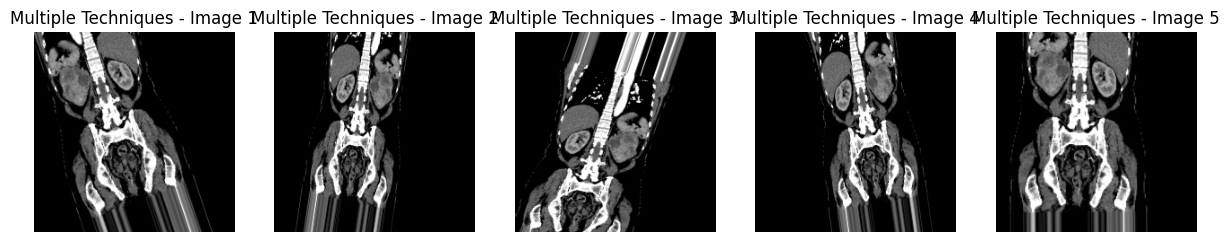

In [6]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

def visualize_augmentation(datagen, generator, num_images_to_plot=5, title=''):
    augmented_images = [generator[0][0][0] for _ in range(num_images_to_plot)]

    fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 3))
    for i in range(num_images_to_plot):
        axes[i].imshow(image.array_to_img(augmented_images[i]))
        axes[i].axis('off')
        axes[i].set_title(f'{title} - Image {i+1}')

    plt.show()
# Define your data directory, image dimensions, and batch size
# Data augmentation with rotation
datagen_rotation = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    fill_mode='nearest'
)
train_generator_rotation = datagen_rotation.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
# Visualize augmentation with rotation
visualize_augmentation(datagen_rotation, train_generator_rotation, title='Rotation')
# Data augmentation with width shift
datagen_width_shift = ImageDataGenerator(
    rescale=1/255,
    width_shift_range=0.2,
    fill_mode='nearest'
)
train_generator_width_shift = datagen_width_shift.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
# Visualize augmentation with width shift
visualize_augmentation(datagen_width_shift, train_generator_width_shift, title='Width Shift')
# Add more data augmentation techniques as needed...
# Data augmentation with multiple techniques
datagen_multiple = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator_multiple = datagen_multiple.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
# Visualize augmentation with multiple techniques
visualize_augmentation(datagen_multiple, train_generator_multiple, title='Multiple Techniques')


Found 12165 images belonging to 4 classes.


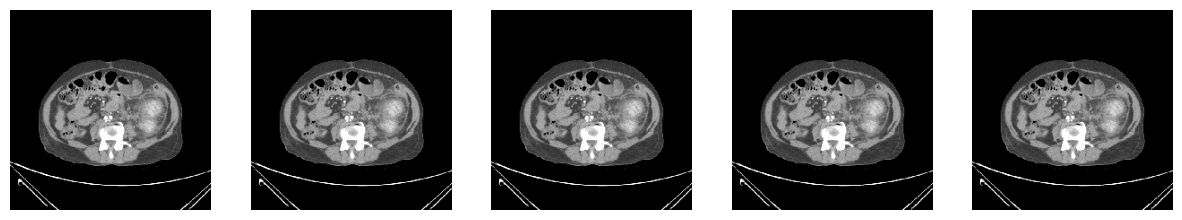

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
import matplotlib.pyplot as plt
from keras.preprocessing import image
# Generate augmented images and plot them
num_images_to_plot = 5  # You can change this number based on your preference
# Retrieve a batch of augmented images from the training generator
augmented_images = [train_generator[0][0][0] for i in range(num_images_to_plot)]
# Plot the augmented images
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 3))
for i in range(num_images_to_plot):
    axes[i].imshow(image.array_to_img(augmented_images[i]))
    axes[i].axis('off')
plt.show()

Found 12165 images belonging to 4 classes.


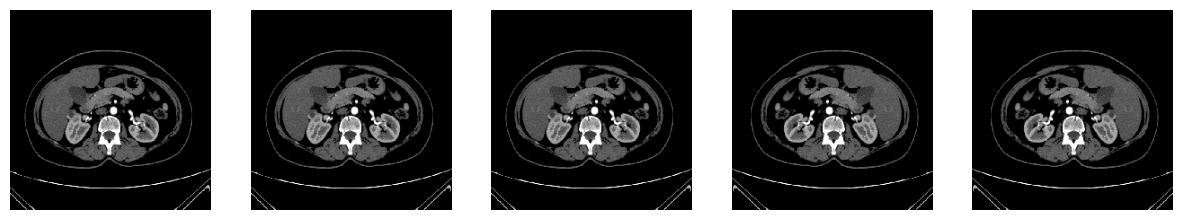

In [8]:
train_datagen1 = ImageDataGenerator(
    rescale=1/255,
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,
    #fill_mode='nearest'
)
train_generator = train_datagen1.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
num_images_to_plot = 5  # You can change this number based on your preference
# Retrieve a batch of augmented images from the training generator
augmented_images = [train_generator[0][0][0] for i in range(num_images_to_plot)]
# Plot the augmented images
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 3))
for i in range(num_images_to_plot):
    axes[i].imshow(image.array_to_img(augmented_images[i]))
    axes[i].axis('off')

plt.show()

Found 12165 images belonging to 4 classes.


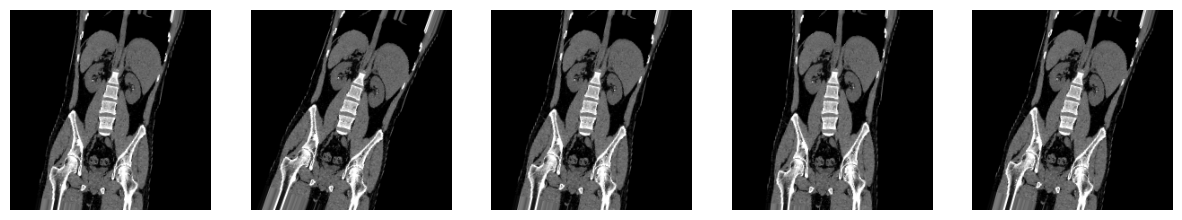

In [9]:
train_datagen1 = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,
    #fill_mode='nearest'
)
train_generator = train_datagen1.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
num_images_to_plot = 5  # You can change this number based on your preference
# Retrieve a batch of augmented images from the training generator
augmented_images = [train_generator[0][0][0] for i in range(num_images_to_plot)]
# Plot the augmented images
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 3))
for i in range(num_images_to_plot):
    axes[i].imshow(image.array_to_img(augmented_images[i]))
    axes[i].axis('off')

plt.show()

Found 12165 images belonging to 4 classes.


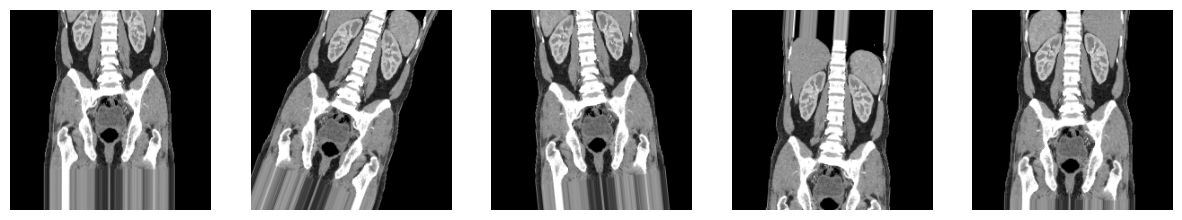

In [10]:
train_datagen1 = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,
    #fill_mode='nearest'
)
train_generator = train_datagen1.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
num_images_to_plot = 5  # You can change this number based on your preference
# Retrieve a batch of augmented images from the training generator
augmented_images = [train_generator[0][0][0] for i in range(num_images_to_plot)]
# Plot the augmented images
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 3))
for i in range(num_images_to_plot):
    axes[i].imshow(image.array_to_img(augmented_images[i]))
    axes[i].axis('off')
plt.show()

Found 12165 images belonging to 4 classes.


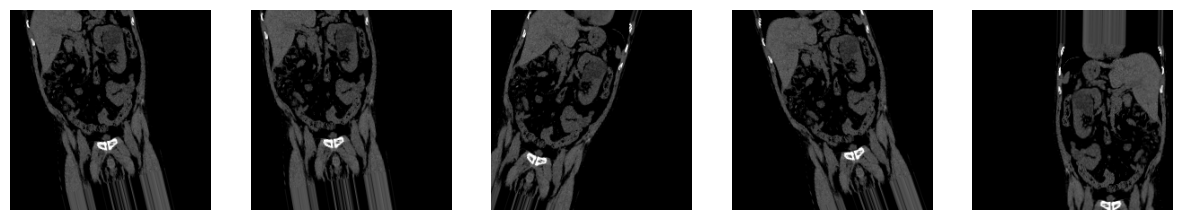

In [11]:
train_datagen1 = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,
    #fill_mode='nearest'
)
train_generator = train_datagen1.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
num_images_to_plot = 5  # You can change this number based on your preference
# Retrieve a batch of augmented images from the training generator
augmented_images = [train_generator[0][0][0] for i in range(num_images_to_plot)]
# Plot the augmented images
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 3))
for i in range(num_images_to_plot):
    axes[i].imshow(image.array_to_img(augmented_images[i]))
    axes[i].axis('off')
plt.show()

Found 12165 images belonging to 4 classes.


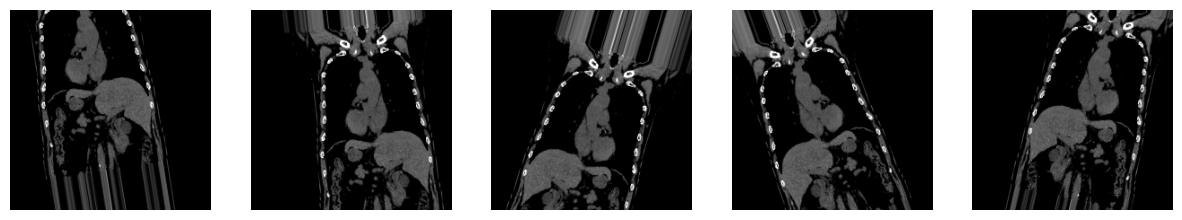

In [12]:
train_datagen1 = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,
    #fill_mode='nearest'
)
train_generator = train_datagen1.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
num_images_to_plot = 5  # You can change this number based on your preference
# Retrieve a batch of augmented images from the training generator
augmented_images = [train_generator[0][0][0] for i in range(num_images_to_plot)]
# Plot the augmented images
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 3))
for i in range(num_images_to_plot):
    axes[i].imshow(image.array_to_img(augmented_images[i]))
    axes[i].axis('off')
plt.show()

Found 12165 images belonging to 4 classes.


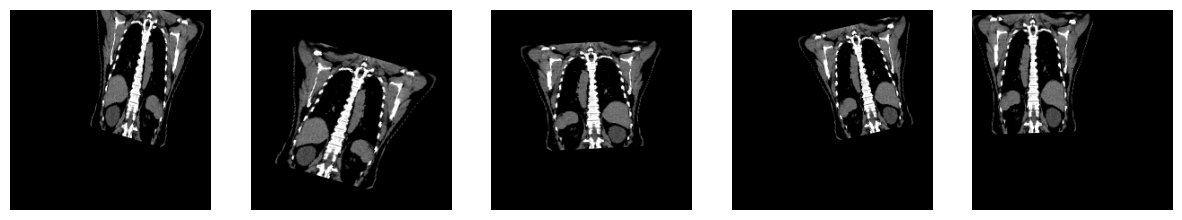

In [13]:
train_datagen1 = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    #fill_mode='nearest'
)
train_generator = train_datagen1.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

num_images_to_plot = 5  # You can change this number based on your preference
# Retrieve a batch of augmented images from the training generator
augmented_images = [train_generator[0][0][0] for i in range(num_images_to_plot)]
# Plot the augmented images
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 3))
for i in range(num_images_to_plot):
    axes[i].imshow(image.array_to_img(augmented_images[i]))
    axes[i].axis('off')
plt.show()

Found 12165 images belonging to 4 classes.


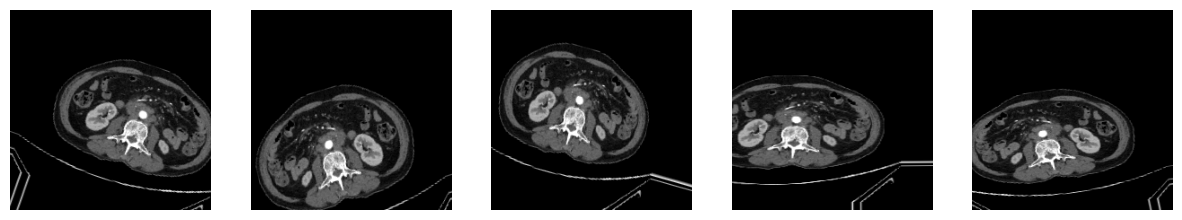

In [15]:
train_datagen1 = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen1.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
num_images_to_plot = 5  # You can change this number based on your preference
# Retrieve a batch of augmented images from the training generator
augmented_images = [train_generator[0][0][0] for i in range(num_images_to_plot)]
# Plot the augmented images
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 3))
for i in range(num_images_to_plot):
    axes[i].imshow(image.array_to_img(augmented_images[i]))
    axes[i].axis('off')
plt.show()

In [17]:
test_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)

In [20]:
epochs = 5
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy'])

Found 12165 images belonging to 4 classes.
Found 1788 images belonging to 4 classes.


In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)
model.save('sedensenet_kidney4.h5')
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/5
381/381 [==============================] - 340s 602ms/step - loss: 0.0421 - accuracy: 0.9891 - val_loss: 0.2823 - val_accuracy: 0.9161
Epoch 2/5
381/381 [==============================] - 224s 588ms/step - loss: 0.0479 - accuracy: 0.9870 - val_loss: 0.0081 - val_accuracy: 0.9950
Epoch 3/5
381/381 [==============================] - 224s 589ms/step - loss: 0.0212 - accuracy: 0.9938 - val_loss: 0.0079 - val_accuracy: 0.9972
Epoch 4/5
381/381 [==============================] - 225s 591ms/step - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.0224 - val_accuracy: 0.9927
Epoch 5/5
381/381 [==============================] - 223s 586ms/step - loss: 0.0237 - accuracy: 0.9933 - val_loss: 6.8658e-05 - val_accuracy: 1.0000
Found 1812 images belonging to 4 classes.
57/57 [==============================] - 14s 251ms/step - loss: 1.4959e-04 - accuracy: 1.0000
Test accuracy: 100.00%


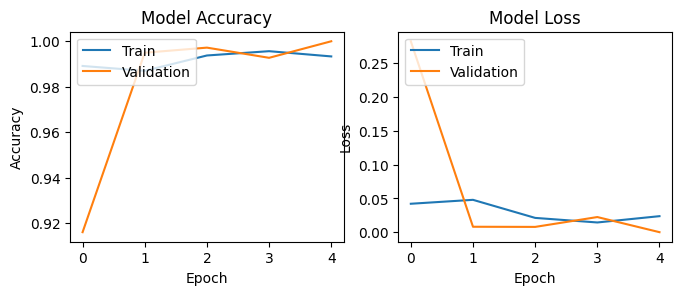

In [22]:
def plot_history(history):
    plt.figure(figsize=(12, 6))
    # Accuracy
    plt.subplot(231)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(232)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
plot_history(history)

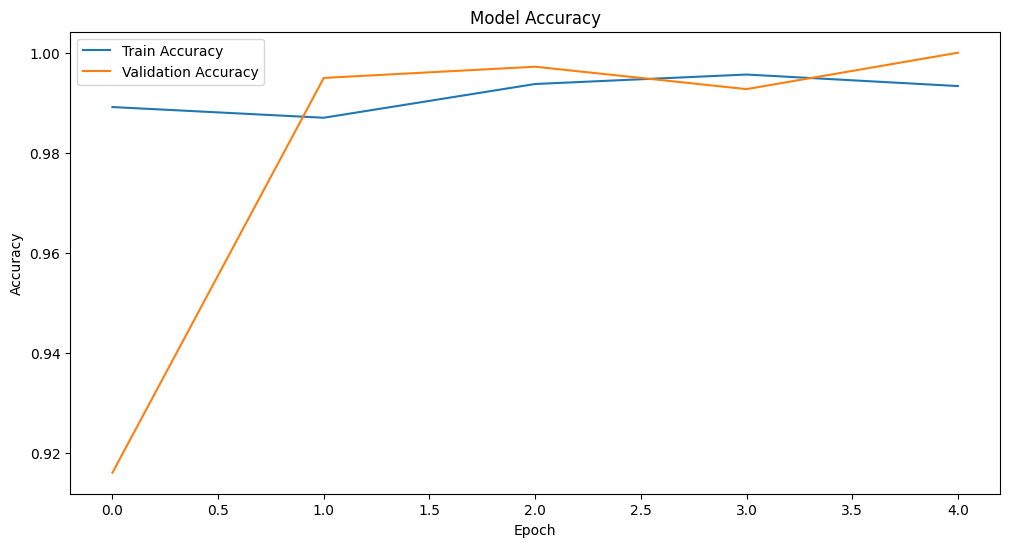

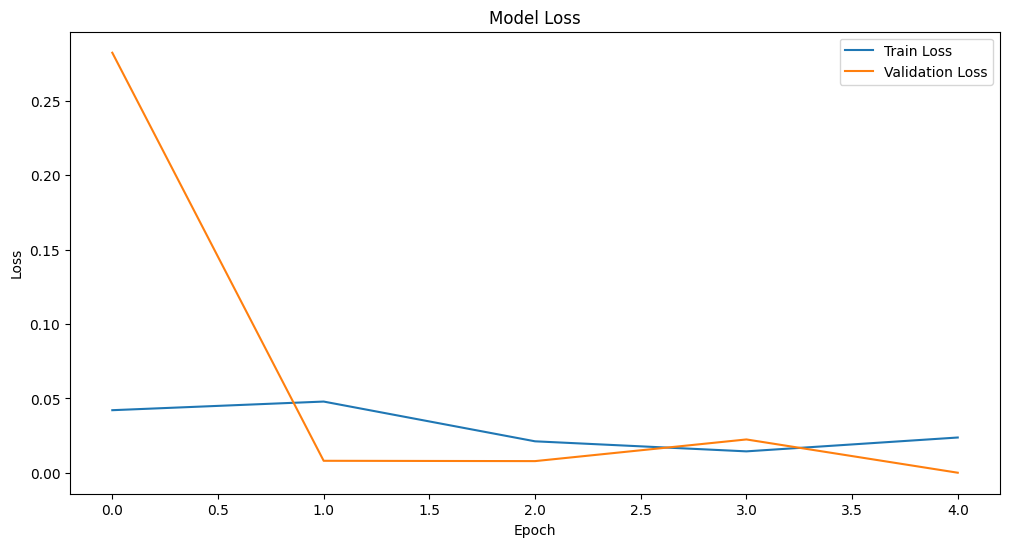

In [23]:
import os
def plot_history(history, save_dir=None):
    # Plot Accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(os.path.join(save_dir, 'accuracy_plot.png'))
    plt.show()

    # Plot Loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    if save_dir:
        plt.savefig(os.path.join(save_dir, 'loss_plot.png'))
    plt.show()

# Call the function with or without specifying a directory to save the figures
plot_history(history, save_dir='/')


In [25]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
image_path='/dataset/test/Cyst/Cyst- (1056).jpg'
img = Image.open(image_path)
img = img.resize((img_width, img_height))
img = np.array(img) / 255.0
img = img.reshape(1, img_width, img_height, 3)

In [27]:
from tensorflow.keras.models import load_model
model = load_model('sedensenet_kidney4.h5')

In [28]:
# Make a prediction
predictions = model.predict(img)
# Get the class with the highest probability
predicted_class = np.argmax(predictions[0])
# Optionally, you can get the class labels based on your dataset
class_labels = [ 'Cyst', 'Normal','Stone','Tumor']
predicted_label = class_labels[predicted_class]
# Print the predicted class label and probabilities
print(f'Predicted Class: {predicted_label}')
print(f'Class Probabilities: {predictions[0]}')

1/1 [==============================] - 8s 8s/step
Predicted Class: Cyst
Class Probabilities: [9.9873954e-01 1.7162674e-06 1.1991904e-03 5.9641545e-05]


In [29]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

true_labels = []
predicted_labels = []

for i in range(len(test_generator)):
    batch_images, batch_labels = test_generator[i]
    true_labels.extend(batch_labels.argmax(axis=1))  # Convert one-hot encoded labels to class indices
    batch_predictions = model.predict(batch_images)
    predicted_labels.extend(batch_predictions.argmax(axis=1))
precision = precision_score(true_labels, predicted_labels, average='weighted')
print(f'Precision Score: {precision:.2f}')

recall = recall_score(true_labels, predicted_labels, average='weighted')
print(f'Recall Score: {recall:.2f}')

f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f'F1 Score: {f1:.2f}')

1/1 [==============================] - 0s 78ms/step
Precision Score: 1.00
Recall Score: 1.00
F1 Score: 1.00


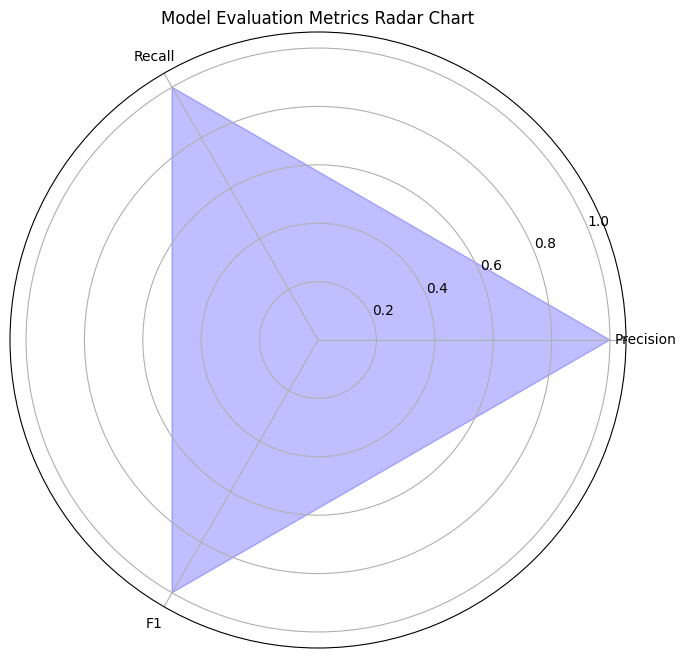

In [30]:
import matplotlib.pyplot as plt
import numpy as np
# Assuming you have already calculated precision, recall, and f1
scores = [precision, recall, f1]
score_names = ['Precision', 'Recall', 'F1']
# Number of metrics
num_metrics = len(scores)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
# Calculate angle for each score
theta = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False)
# Plot the scores on the radar chart
ax.fill(theta, scores, color='b', alpha=0.25)
ax.set_thetagrids(theta * 180 / np.pi, score_names)
plt.title('Model Evaluation Metrics Radar Chart')
plt.show()

In [31]:
from sklearn.metrics import classification_report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

        Cyst       1.00      1.00      1.00       542
      Normal       1.00      1.00      1.00       735
       Stone       1.00      1.00      1.00       203
       Tumor       1.00      1.00      1.00       332

    accuracy                           1.00      1812
   macro avg       1.00      1.00      1.00      1812
weighted avg       1.00      1.00      1.00      1812



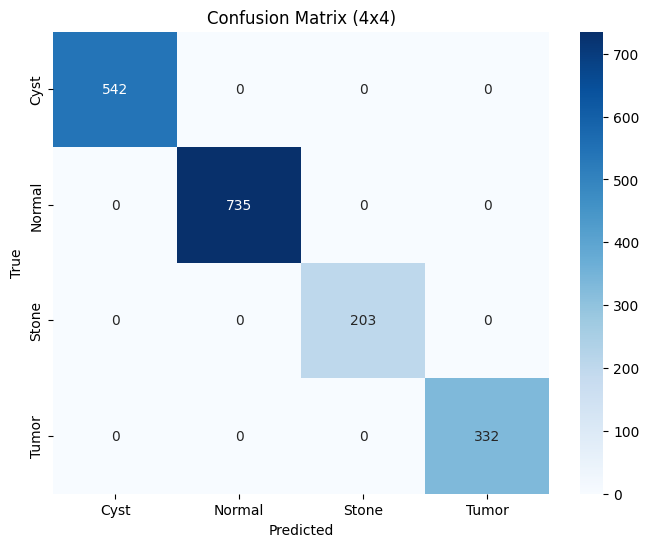

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion = confusion_matrix(true_labels, predicted_labels)

class_labels = ['Cyst', 'Normal', 'Stone', 'Tumor']

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (4x4)')
plt.show()